In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import tensorflow
import keras

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.xception import Xception
from keras.applications.resnet50 import ResNet50
from keras.applications.densenet import DenseNet121
from keras.layers import Input, Flatten, Dense, Dropout
from keras.regularizers import l2
import matplotlib.pyplot as plt

In [ ]:
from keras import backend as K
K.clear_session()

In [6]:
!unzip /content/drive/MyDrive/weather_prediction/Medicinalplantdataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Medicinal plant dataset/Avacado/5644.jpg  
  inflating: Medicinal plant dataset/Avacado/5645.jpg  
  inflating: Medicinal plant dataset/Avacado/5646.jpg  
  inflating: Medicinal plant dataset/Avacado/5647.jpg  
  inflating: Medicinal plant dataset/Avacado/5648.jpg  
  inflating: Medicinal plant dataset/Avacado/5649.jpg  
  inflating: Medicinal plant dataset/Avacado/5650.jpg  
  inflating: Medicinal plant dataset/Avacado/5651.jpg  
  inflating: Medicinal plant dataset/Avacado/5652.jpg  
  inflating: Medicinal plant dataset/Avacado/5653.jpg  
  inflating: Medicinal plant dataset/Avacado/5654.jpg  
  inflating: Medicinal plant dataset/Avacado/5655.jpg  
  inflating: Medicinal plant dataset/Avacado/5656.jpg  
  inflating: Medicinal plant dataset/Avacado/5657.jpg  
  inflating: Medicinal plant dataset/Avacado/5658.jpg  
  inflating: Medicinal plant dataset/Avacado/5659.jpg  
  inflating: Medicinal plant dataset/Avacado/5660.jpg

In [7]:
dataset = '/content/Medicinal plant dataset'

In [8]:
data_gen = ImageDataGenerator(rescale=1./255, rotation_range=180, brightness_range=[0.2, 1.0], horizontal_flip=True,validation_split=0.2)

In [9]:
train_imgs = data_gen.flow_from_directory(dataset, target_size=(224,224),class_mode='categorical', subset='training', shuffle=True)
test_imgs = data_gen.flow_from_directory(dataset, target_size=(224,224),class_mode='categorical', subset='validation', shuffle=True)

Found 4765 images belonging to 40 classes.
Found 1180 images belonging to 40 classes.


In [10]:
input = Input(shape=(224, 224, 3))
model = DenseNet121(include_top=False, weights='imagenet', input_tensor=input)
model.trainable=True
# for layers in model.layers[-1:-5:-1]:
#   layers.trainable=True

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [11]:
# output = model.output
# x = Flatten()(output)
# x = Dense(1024, activation='relu', kernel_regularizer=l2(0.001))(x)
# x = Dropout(0.2)(x)
# x = Dense(512, activation='relu', kernel_regularizer=l2(0.001))(x)
# x = Dropout(0.2)(x)
# x = Dense(40, activation='softmax')(x)

output = model.output
x = Flatten()(output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(40, activation='softmax')(x)

In [12]:
model = keras.Model(inputs=input, outputs=x)

In [16]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('best_model_.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
callbacks = [checkpoint]


optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.09)

model.compile(loss=tensorflow.keras.losses.CategoricalCrossentropy(), optimizer=optimizer, metrics=['accuracy'])

history = model.fit(train_imgs, epochs=5,
                    validation_data=test_imgs,
                    callbacks=callbacks
                    )

Epoch 1/5
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 977ms/step - accuracy: 0.9893 - loss: 0.0315
Epoch 1: val_accuracy improved from -inf to 0.97542, saving model to best_model_.keras
149/149 ━━━━━━━━━━━━━━━━━━━━ 327s 1s/step - accuracy: 0.9893 - loss: 0.0315 - val_accuracy: 0.9754 - val_loss: 0.0874
Epoch 2/5
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 566ms/step - accuracy: 0.9878 - loss: 0.0347
Epoch 2: val_accuracy improved from 0.97542 to 0.97627, saving model to best_model_.keras
149/149 ━━━━━━━━━━━━━━━━━━━━ 168s 887ms/step - accuracy: 0.9878 - loss: 0.0347 - val_accuracy: 0.9763 - val_loss: 0.0681
Epoch 3/5
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 585ms/step - accuracy: 0.9867 - loss: 0.0297
Epoch 3: val_accuracy improved from 0.97627 to 0.97712, saving model to best_model_.keras
149/149 ━━━━━━━━━━━━━━━━━━━━ 143s 890ms/step - accuracy: 0.9867 - loss: 0.0298 - val_accuracy: 0.9771 - val_loss: 0.0656
Epoch 4/5
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 569ms/step - accuracy: 0.9852 - loss: 0.0346
Epoch 4: val_accuracy did

In [17]:
densenet121 = keras.models.load_model('/content/best_model_.keras')
densenet121.save('/content/drive/MyDrive/Research Project/densenet121_new.keras')

In [ ]:
10+10                                                                                                                                                                                                                                                                            `history

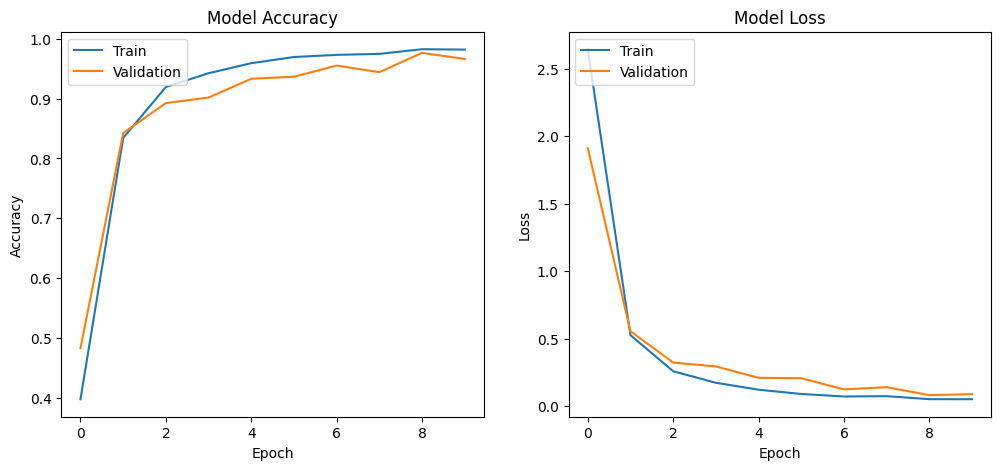

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [ ]:
model.save('/content/drive/MyDrive/Extras/Plants_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
